In [1]:
import numpy as nm
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as mtp
from sklearn.preprocessing import StandardScaler

In [2]:
data_set=pd.read_csv(r"C:\Users\hegde\Downloads\User_Data.csv")

In [3]:
x=data_set.iloc[:,[2,3]].values
y=data_set.iloc[:,[4]].values

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#feature scaling

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
# print(x_test)

In [4]:
from sklearn.ensemble import RandomForestClassifier
#fitting random forest tree classifier to the training set
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(x_train,y_train)
#predicting the test set result
y_pred=classifier.predict(x_test)

C:\Users\hegde\AppData\Local\Temp\ipykernel_12544\139231415.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train,y_train)


In [5]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.91


In [6]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[63,  5],
       [ 4, 28]], dtype=int64)

In [7]:
classifier.estimator_

DecisionTreeClassifier()

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import recall_score,ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [9]:
bank_data=pd.read_csv(r"C:\Users\hegde\Downloads\bank.csv")

In [10]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [11]:
bank_data['default']=bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y']=bank_data['y'].map({'no':0,'yes':1})

In [12]:
X=bank_data.drop('y',axis=1)
X.isnull().sum()
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
#split data into features (X) and target (y)
X=bank_data.drop('y',axis=1)
X=X[['age','default','balance','duration','campaign','pdays','previous']]
y=bank_data['y']

#split the data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [14]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
y_pred=rf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [16]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8950276243093923


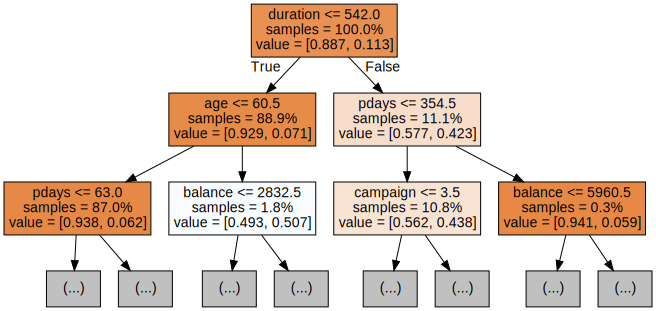

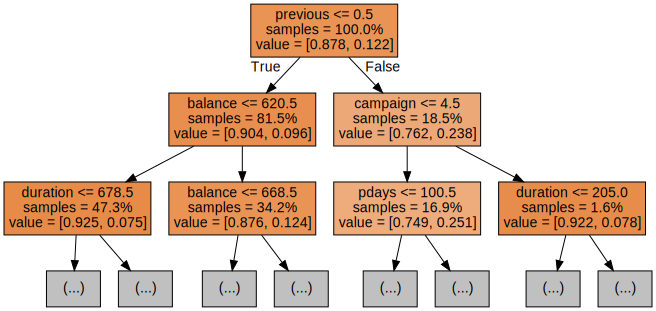

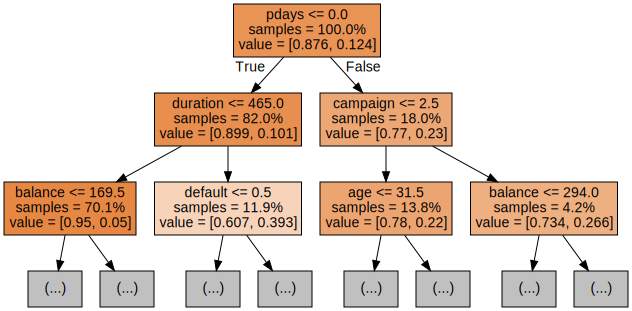

In [17]:
for i in range(3):
    tree=rf.estimators_[i]
    dot_data=export_graphviz(tree,
                            feature_names=X_train.columns,
                            filled=True,
                            max_depth=2,
                            impurity=False,
                            proportion=True)
    graph=graphviz.Source(dot_data)
    display(graph)

# ADABOOSt classifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [22]:
abc=AdaBoostClassifier(n_estimators=50,
                       learning_rate=1)
model=abc.fit(X_train,y_train)

y_pred=model.predict(X_test)
y_pred

array([2, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2,
       0, 2, 2, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1,
       0])

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9333333333333333


# Using Different Base Learners

In [26]:
from sklearn.svm import SVC

from sklearn import metrics

svc=SVC(probability=True,kernel='rbf')

SVC_class=AdaBoostClassifier(n_estimators=50,estimator=svc,learning_rate=1)

SVC_model=SVC_class.fit(X_train,y_train)

SVC_y_pred=SVC_model.predict(X_test)

print("Accuracy :",metrics.accuracy_score(y_test,SVC_y_pred))

Accuracy : 0.9111111111111111


In [28]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached catboost-1.2.2-cp311-cp311-win_amd64.whl (101.0 MB)


In [33]:
from sklearn.svm import SVC

from sklearn import metrics

svc=SVC(probability=True,kernel='rbf')

SVC_class=RandomForestClassifier(n_estimators=50,random_state=1)

SVC_model=SVC_class.fit(X_train,y_train)

SVC_y_pred=SVC_model.predict(X_test)

print("Accuracy :",metrics.accuracy_score(y_test,SVC_y_pred))

Accuracy : 0.8888888888888888


In [37]:
import xgboost
from sklearn import model_selection
from sklearn.metrics import accuracy_score

iris=datasets.load_iris()
X=iris.data
Y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=7)


#fit model no trainign daata
model=xgboost.XGBClassifier()
model.fit(X_train,y_train)
print(model)

#make pred for test data
y_pred=model.predict(X_test)
predictions=[round(value) for value in y_pred]
predictions

#evalute pred
accuracy=accuracy_score(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy*100.0))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
Accuracy: 90.00%


# Catboost 

In [39]:
import numpy as np 
from catboost import CatBoostRegressor
train=pd.read_csv(r"C:\Users\hegde\Downloads\Train.csv")
test=pd.read_csv(r"C:\Users\hegde\Downloads\Test.csv")

In [46]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,-999,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [47]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,-999,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,-999,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,-999,Tier 2,Supermarket Type1
4,FDY38,-999.000,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [40]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [41]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [42]:
#imputing missing values for both traib and test
train.fillna(-999,inplace=True)
test.fillna(-999,inplace=True)

In [43]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [44]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [54]:
# #creating missing values for both train and test
# X=train.drop(['Item_Outlet_Sales'],axis=1)
# y=train.drop(['Item_Outlet_Sales'],axis=1)


# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=7)


#Creating a training set for modeling and validation set to check model performance
X = train.drop(['Item_Outlet_Sales'], axis=1)
y = train.Item_Outlet_Sales

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)


In [55]:
X.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [56]:
categorical_features_indices = np.where(X.dtypes != float)[0]
categorical_features_indices

array([ 0,  2,  4,  6,  7,  8,  9, 10], dtype=int64)

In [57]:
#importing library and building model
from catboost import CatBoostRegressor
model=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1617.4839613	test: 1638.6750060	best: 1638.6750060 (0)	total: 156ms	remaining: 7.67s
1:	learn: 1548.7252173	test: 1571.4689244	best: 1571.4689244 (1)	total: 171ms	remaining: 4.1s
2:	learn: 1486.6744500	test: 1508.9944267	best: 1508.9944267 (2)	total: 182ms	remaining: 2.85s
3:	learn: 1433.2671219	test: 1454.8181715	best: 1454.8181715 (3)	total: 190ms	remaining: 2.19s
4:	learn: 1386.6820658	test: 1410.1538864	best: 1410.1538864 (4)	total: 205ms	remaining: 1.85s
5:	learn: 1346.3282575	test: 1369.4484784	best: 1369.4484784 (5)	total: 214ms	remaining: 1.57s
6:	learn: 1312.9615153	test: 1336.4006048	best: 1336.4006048 (6)	total: 223ms	remaining: 1.37s
7:	learn: 1282.3060492	test: 1306.3036897	best: 1306.3036897 (7)	total: 246ms	remaining: 1.29s
8:	learn: 1256.2327964	test: 1279.6733212	best: 1279.6733212 (8)	total: 255ms	remaining: 1.16s
9:	learn: 1233.5849214	test: 1258.6132990	best: 1258.6132990 (9)	total: 266ms	remaining: 1.06s
10:	learn: 1214.2783430	test: 1238.8643633	best: 12

In [58]:
submission = pd.DataFrame()
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']
submission['Item_Outlet_Sales'] = model.predict(test)
submission.to_csv("Submission.csv")